# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import regex
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import textblob
from textblob import TextBlob
from PIL import Image
from warnings import filterwarnings
filterwarnings('ignore')

# Preprocessing

In [2]:
df = pd.read_csv("preprocessed_data.csv")
df = df.iloc[:,1:2]
df.head()

,text
0,"The ways of God in Nature, as in Providence, a..."
1,"What chance, good lady, hath bereft you thus? ..."
2,Intensos rigidarn in frontern ascendere canos ...
3,"DURING the fall of the year 1827, while residi..."
4,"Dicebant mihi sodales, si sepulchrum amicae vi..."


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/berkeakkaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/berkeakkaya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
#upper-lowercase letter
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')
#numbers
df['text'] = df['text'].str.replace('\d','')
#stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
#lemmi
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [6]:
df["text"]

0     way god nature providence way model frame way ...
1     chance good lady hath bereft thus comus quiet ...
2     intensos rigidarn frontern ascendere canos pas...
3     fall year residing near charlottesville virgin...
4     dicebant mihi sodales si sepulchrum amicae vis...
                            ...                        
65    astounding news express via norfolkthe atlanti...
66    sequel murder rue morgue e giebt eine reihe id...
67    speaking poetic principle design either thorou...
68    late account rotterdam city seems high state p...
69    well known wise men came east mr touchandgo bu...
Name: text, Length: 70, dtype: object

In [7]:
freq_df = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis =0).reset_index()

In [8]:
freq_df.columns = ["words","frequencies"]

In [9]:
freq_df.shape

(22261, 2)

In [10]:
a = freq_df[freq_df.frequencies > freq_df.frequencies.mean() + 
        freq_df.frequencies.std()]

# Wordcloud

In [11]:
##rejoin all filtered words into a single string
filtered_text = ' '.join(df["text"])

In [12]:
##Load the Poe's Portrait into a numpy array
##It will give us a mask for the word cloud and a color scheme
Portrait = np.array(Image.open('Portrait.jpeg'))

In [13]:
##create Word Cloud
wc = WordCloud(background_color='white', mask=Portrait, stopwords=sw,max_words=500, width=1080, height = 720)
wc.generate(filtered_text)

In [14]:
##create color_imprint
color_imprint = ImageColorGenerator(Portrait)
##Recolor the word cloud using the colors in the imprint
wc.recolor(color_func=color_imprint)
##export the wordcloud to a file
wc.to_file('PoeCloud.png')

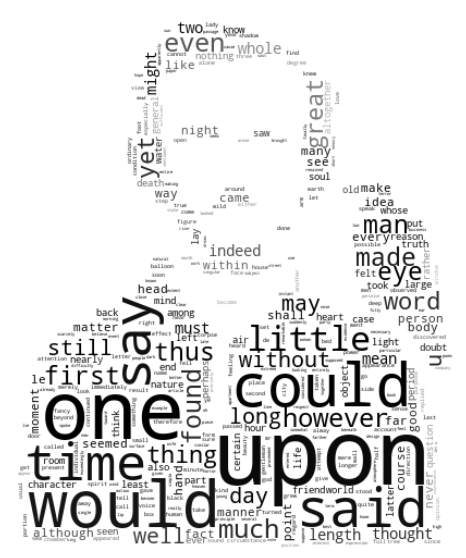

In [15]:
##Visualize the wordcloud
plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Analysis

In [16]:
def sentiment_scored(df):
    #got the stories from inside the data frame
    text = df['text']
    #scrolled through the tweets
    for i in range(0, len(text)):
        #assign the retrieved story to textB
        textB = TextBlob(text[i])
        #scored with sentiment.polarity function according to the received story.
        sentiment_score = textB.sentiment.polarity
        #added the sentiment score to the corresponding column of the dataframe
        df.at[i, 'sentiment_score'] = sentiment_score
        #Wadded a sentiment class according to the sentiment score to the relevant column.
        if sentiment_score <0.00:
            sentiment_class = 'Negative'
            df.at[i, 'sentiment_class'] = sentiment_class
        elif sentiment_score >0.00:
            sentiment_class = 'Positive'
            df.at[i, 'sentiment_class'] = sentiment_class
        else:
            duygu_sinifi = 'Neutral'
            df.at[i, 'sentiment_class'] = sentiment_class
    return df

In [17]:
sentiment_scored(df)

,text,sentiment_score,sentiment_class
0,way god nature providence way model frame way ...,0.048650,Positive
1,chance good lady hath bereft thus comus quiet ...,0.079877,Positive
2,intensos rigidarn frontern ascendere canos pas...,0.130692,Positive
3,fall year residing near charlottesville virgin...,0.063515,Positive
4,dicebant mihi sodales si sepulchrum amicae vis...,0.016242,Positive
...,...,...,...
65,astounding news express via norfolkthe atlanti...,0.092496,Positive
66,sequel murder rue morgue e giebt eine reihe id...,0.031618,Positive
67,speaking poetic principle design either thorou...,0.147949,Positive
68,late account rotterdam city seems high state p...,0.087447,Positive


In [18]:
df.groupby("sentiment_class").count()

,text,sentiment_score
sentiment_class,,
Negative,3,3
Positive,67,67
